In [ ]:
# have a look at array.reshape()
#do exercise in notebook *13-High_Dimension*
#do exercise in notebook *14-Dimensionality_Reduction*
# read about singular vectors / values

!pip install #package
https://www.desmos.com/calculator?lang=de

In [ ]:
#Suitable methods
import numpy as np

Z = np.column_stack([Z1,Z2])
Y_binary = (Y > 1)*1        #convert (True/False) into binary array
indexToCity = {i: unique_cities[i] for i in range(n_cities)} # create dictionary
np.corrcoef() # Correlation matrix 


In [ ]:
# Random shuffle of given array 

def randint(b):
    """Producing random integers between 0 and b inclusive"""
    u = random()
    from math import floor
    return floor(u*(b+1))

def random_shuffle(arr):
    """Shuffles an array in place"""
    n = len(arr)
    for i in range(n-1,0,-1):
        j = randint(i) # Random integer between 0 and i inclusive
        tmp = arr[j]
        arr[j] = arr[i]
        arr[i] = tmp
    return arr

## Data Science project

In [ ]:
# import data
import pandas as pd
problem2_df = pd.read_csv("salaries.csv") #delim_whitespace=True if csv seperated by space

#Standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#train-test-split   OR train_test_validation() from utils
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#Import model
from sklearn.linear_model import LinearRegression
#Initialize model
problem2_model = LinearRegression()
#Train model
problem2_model.fit(X_train,y_train)

#MAE
MAE = np.mean(np.abs(Y_test - lr.predict(X_test)))

#Plot the empirical distribution function of the residual with confidence bands
# (i.e. using the DKW inequality and 95% confidence) -> Utils `plotEDF,makeEDF` 

from Utils import makeEDF,plotEDF
residual = Y_test - lr.predict(X_test)
edf = makeEDF(residual)
plotEDF(edf,confidence_band=True)

#Classification report
#also own Utils function (classification_report_interval) with intervals 
from sklearn.metrics import classification_report
print(classification_report(Y_test,test_prediction))

## 1. Probability model

- **$\sigma$-algebra** $\mathcal{F}$ is a collection of subsets of $\Omega$: &rarr; often / not always set of all subsets 
    - $\Omega \in \mathcal{F}$ 
    - $A \in \mathcal{F} \Rightarrow A^c\in \mathcal{F}$ &rarr; closed under complementation
    - $A_1, A_2, \dots \in \mathcal{F} \Rightarrow A_1 \cup A_2\cup \dots \in \mathcal{F}$ &rarr; closed under countable union
- **probability distribution**: 
    - $\mathbb{P}(\Omega) =1$ &rarr; "something happens"
    - $A,B \in \mathcal{F}, A \cap B = \empty \Rightarrow \mathbb{P}(A\cup B) = \mathbb{P}(A)+\mathbb{P}(B)$
- **probability triple**: $(\Sigma, \mathcal{F},\mathbb{P})$ &rarr; $\mathcal{F}$ describes what is observable; $\mathbb{P}$ prescribes its values
    - $\forall A \in \mathcal{F}: \mathbb{P}(A^c)=1- \mathbb{P}(A)$
    - $A,B \in \mathcal{F}, A \subset B \Rightarrow \mathbb{P}(A) \leq \mathbb{P}(B)$
    - **inlusion-exclusion principle**: $\mathbb{P}(A\cup B) = \mathbb{P}(A) + \mathbb{P}(B)- \mathbb{P}(A\cap B)$
    - **Boole's inequality**: $\mathbb{P}(A\cup B) \leq \mathbb{P}(A) + \mathbb{P}(B)$
- **conditional probability**: $\mathbb{P}(B|A) = \frac{\mathbb{P}(A\cap B)}{\mathbb{P}(A)}$
    - $ \Rightarrow \mathbb{P}(A\cap B) = \mathbb{P}(A|B) \mathbb{P}(B)= \mathbb{P}(B|A)  \mathbb{P}(A)$
    - **Bayes' theorem**: $\mathbb{P}(B|A) = \frac{\mathbb{P}(B)\mathbb{P}(A| B)}{\mathbb{P}(A)}$
- **independent events**: events have no effect on each other
    - $\mathbb{P}(A\cap B) = \mathbb{P}(A) \mathbb{P}(B) \iff\mathbb{P}(A\vert B) =\mathbb{P}(A) \iff \mathbb{P}(B|A) =\mathbb{P}(B) $

## 2. Random variables

- **random variable**: function $X : \Omega \rightarrow \mathbb{R}$
    - maps every outcome to real value
- **cumulative distribution function**: $F_X(x) = \mathbb{P}(X\leq x)$
    - $X \sim F$
    - $ a < b$: $\mathbb{P}(a \leq x \leq b) = F(b) - F(a)$
- **discrete RV**:
    - **probability mass function PMF**: $f_X(x) = \mathbb{P}(X=x)
-**continuous RV**: 
    - **probability density function PDF**:$f_X$ such that $F_X^\prime(x) = f_X(x)$ with $F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(v)dv$
    - $\mathbb{P}(X=x)=0$
    -**standard normal / gaussian**: $F_X(x) = \frac{1}{\sqrt{2 \pi}}\exp^{-\frac{x^2}{2}}$

- **multivariate RV**: function $X: \Omega \rightarrow \mathbb{R}^m$
    - **joint cumulative distibruiton function**: $F_X(x) = \mathbb{P}(\bigcap (X_i \leq x_i)) = \mathbb{P}(X_1 \leq x_1, \dots , X_m \leq x_m)$
    - **marginal distribution** of $X_i$: probability when igrnoring all other $X_j$ ith $i \neq j$ &rarr; $F_{X_i}(x_i) = \mathbb{P}(X_i \leq x_i) = \mathbb{P}(X_1 \leq \infty, \dots, X_i \leq x_i, \dots, X_m \leq \infty)$
        - **discrete random vectors**
            - **joint probability mass function**: $f_X(x) = \mathbb{P}(X=x)$
            - **marginal mass function**: $f_{X_i}(x_i) = \mathbb{P}(X_i = x_i)  = \sum_{x_j} f_X(x_i,x_j)$
        - **continuous random vectors**:
            - **joint probability density function**: $F_X(x) = \mathbb{P}(X\leq x) = \int_{- \infty}^{x_1} \dots \int_{-\infty}^{x_m} f_X(v1,\dots,v_m)dv1 \dots dv_m$
            - **marginal denisty function**: $f_{X_i}(x_i) ? \int_{-\infty}^{\infty}f_X(x_i,x_j, \dots)dx_j \dots$ &rarr; intigration only over other variables, not $x_i$
            
- **Independence** of two RVs $\iff \mathbb{P}(X_1 \leq x_1, X_2 \leq x_2) = \mathbb{P}(X_1 \leq x_1) \mathbb{P}(X_2 \leq x_2) \\
\iff f_{X_1,X_2}(x_1, x_2) = f_{X_1}(x_1) f_{X_2}(x_2) \\ \iff
F_{X_1,X_2}(x_1, x_2) = F_{X_1}(x_1) F_{X_2}(x_2)$
    - **iid**: independent & indentically distributed

- **conditional RV**:
    - **conditional distribution function**: $F_{X|Y}(x|A) = \frac{\mathbb{P}(X\leq x,y\in A)}{\mathbb{P}(y\in A)}$
        - continuous: $ = \int_{-\infty}^{x} \frac{f_{X,Y} (u,y)}{f_Y(y)} du$
        - discrete: $ = \frac{\mathbb{P}(X\leq x,Y = y)}{\mathbb{P}(Y =y)}$
    - **conditional mass / density function**: $ \mathbb{P}(X=x | Y=y) = \frac{\mathbb{P}(X = x,Y = y)}{\mathbb{P}(Y =y)}$
        - continuous: $ \mathbb{P}(X\in A | Y = y) = \int_A f_{X|Y}(x|y)dx$
        - discrete: $=f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}$

- **expectation**: average of $X$
    - $\mathbb{E}(X) = \int x dF(x) = \begin{cases} \sum_x xf(x), & X \text{ discrete}\\\int xf(x)dx, & X \text{ continuous}\end{cases}$
    - exists if $\int |x|dF(x) < \infty$
    - **law of unconcious statistician**: given $Y=g(X) \\ \Rightarrow \mathbb{E}(Y) = \mathbb{E}(g(X))= \int g(x) dF(x) = \begin{cases} \sum_x g(x)f(x), & X \text{ discrete}\\\int g(x)f(x)dx, & X \text{ continuous}\end{cases}$
    - properties:
        - $\mathbb{E}(\sum a_iX_i) = \sum a_i \mathbb{E}(X_i)$
        - $X_i$ independent $\Rightarrow \mathbb{E}(\prod X_i) = \prod \mathbb{E}(X_i)$
        - $X_1 \leq X_2 \Rightarrow \mathbb{E}(X_1) \leq \mathbb{E}(X_2)$
        - $\mathbb{E}(\mathbb{1}_A(x)) = \mathbb{P}(X \in A)$
    - **conditional expectation**: $\mathbb{E}(X|Y=y) = \int x f_{X|Y}(x|y)dx$
        - **tower property**: $\mathbb{E}[\mathbb{E}[X|Y]] = \mathbb{E}[X]$ 
- **variance**: measure of spread of distribution / 2nd moment
    - $\mathbb{V}(X) = \mathbb{E}[(X- \mathbb{E}(X))^2] = \int (x-\mathbb{E}(X))^2 dF(x) = \mathbb{E}(X^2) -\mathbb{E}(X)^2$
    - $\mathbb{V}(\sum a_iX_i) = \sum a_i^2 \mathbb{V}(X_i)$
- **$k^{\text{th}}$-moment**: $\mathbb{E}(X^k) = \int x^k dF(x)$
    - existis if $\mathbb{E}(|X|^k)<\infty$
    - **skewardness**: 3rd standardized moment: measure symetry
    - **kurtosis**: 4th standardized moment: measures occurace of outliers / tailedness
    - $j< k$: if kth moment exists $\Rightarrow$ jth moment exists
    - **moment generating function**: $Phi_X(t) = \mathbb{E}(\exp^{tX}) = \int \exp^{tX} dF(x)$ 

## 3. Concentration

- **concentration of measure**: statement of the following form: $\forall \delta \in (0,1) \exists \epsilon >0 : \mathbb{P}(|X-\mathbb{E}|\geq \epsilon ) \leq \delta$
- **Chebychev's inequality**: $\forall \text{RV} X\text{and} \forall \epsilon >0: \mathbb{P}(|X-\mathbb{E}(X)|\geq \epsilon ) \leq \frac{\mathbb{V}(X)}{\epsilon^2}$
    - $\mathbb{P}(|\bar{X}_n-\mathbb{E}(\bar{X}_n)|\geq \epsilon ) \leq \frac{\mathbb{V}(X)}{n \epsilon^2}$
- **Hoeffdings inequality**: $(\Omega,\mathcal{F},\mathbb{P}), X_1, \dots X_n \sim^{iid} \mathcal{F }  \mathbb{R}$-valued RVs with $\mathbb{P}(X_i \in [a,b])=1$ &rarr; bounded,$\bar{X}_n = \frac{1}{n}\sum X_i: \\ \forall\epsilon >0: \mathbb{P}(\bar{X}_n - \mathbb{E}(\bar{X}_n) \geq \epsilon ) \leq e^{-\frac{2n\epsilon^2}{(b-a)^2}}$
    - $\mathbb{P}(|\bar{X}_n - \mathbb{E}(\bar{X}_n|) \geq \epsilon ) \leq 2e^{-\frac{2n\epsilon^2}{(b-a)^2}}$
    - **Hoeffdings lemma**: $X$ RV s.th. $\mathbb{P}(X \in [a,b]) = 1 \Rightarrow \mathbb{E}[e^{\lambda(X-\mathbb{E}(X))}] \leq e^{\frac{\lambda^2(b-a)^2}{8}} \quad \forall \lambda\in \mathbb{R}$
    - compute $\epsilon$ for Bernoulli: $\epsilon = \sqrt{ \frac{1}{2n}\ln(\frac{2}{\delta})}$
    - general $\epsilon$: $\epsilon = \sqrt{\frac{(a-b)^2}{2n}\ln(\frac{2}{\alpha})} \quad$ for $1-\alpha$ confidence interval
- **Bennett's inequality**: finite variance & boundedness is given
    $\forall \epsilon>0: \mathbb{P}(\bar{X}_n - \mathbb{E}(\bar{X}_n) \geq \epsilon) \leq e^{\frac{-h\sigma^2}{b^2} h(\frac{b\epsilon}{\sigma^2})}$ with $h(u) = (1+u)\log(1+u)-u  \quad n>0$
- **confidence interval**: random interval $I = [\text{mean}-\epsilon, \text{mean}+\epsilon]$
    - probability that $I$ covers $\mathbb{E}(X)$/main value is at least $1-\delta$
    - $\Rightarrow \mathbb{P}(\mathbb{E}(X)\in I)\geq 1-\delta$
    - compute interval using Hoeffdings &rarr; see above

- **law of large numbers**: distribution of $\bar{X}_n$ more contentrated around $\mu$ as $n$ gets larger
    - given $X_1, X_2, \dots \in L^2(\mathbb{P})$ sequence of iid RVs with $\mathbb{E}[X_i]=\mu \Rightarrow \bar{X}_n \rightarrow^{\mathbb{P}} \mu \quad$ &rarr; convergence in prob.
- **sub-Gaussian** RV $X$ if $\exists \lambda$:$\mathbb{E}[e^{s(X-\mathbb{E}[X])}] \leq \underbrace{e^{\frac{s^2\lambda^2}{2}}}_{\text{moment generating fct of gaussian distribution}} \quad \forall s$
    - bounding the tails
    - $\Rightarrow \mathbb{P}(\bar{X}_n-\mathbb{E}[\bar{X}_n] \geq\epsilon) \leq e^{-\frac{n\epsilon^2}{2\lambda^2}}$
    - $\Rightarrow \alpha X \text{sub-Gaussian with} |\alpha|\lambda$
    - $\Rightarrow X^2 \text{sub-Gaussian with} 8\lambda^2$
    - $\Rightarrow X+Y (\text{independent}) \text{sub-Gaussian with} \sqrt{\lambda_1^2+\lambda_2^2}$
    - bounded RV $\Rightarrow X \text{sub-Gaussian with} \frac{(b-a)}{2}$
    - $\Rightarrow X \text{sub-Exponential with } \lambda$
    - look at moment generating functions $\mathbb{E}(e^{sX})$

    
- **sub-Exponential** RV $X$ if $\exists \lambda$:$\mathbb{E}[e^{s(X-\mathbb{E}[X])}] \leq \underbrace{e^{\frac{s^2\lambda^2}{2}}}_{\text{moment generating fct of gaussian distribution}} \quad \forall |s|\leq \frac{1}{\lambda}$
    - weaker bounds on the tails than sub-Gaussian since it only holds for small $s$
    - for large $\epsilon$ the tail is exponential $e^{-\epsilon}$
    - $\Rightarrow \mathbb{P}(\bar{X}_n-\mathbb{E}[\bar{X}_n] \geq\epsilon) \leq e^{-\frac{n\epsilon^2}{2\lambda^2}} \wedge e^{-\frac{n(\epsilon+1)}{2\lambda}}$
    - $\Rightarrow \alpha X \text{sub-Exponential with} |\alpha|\lambda$

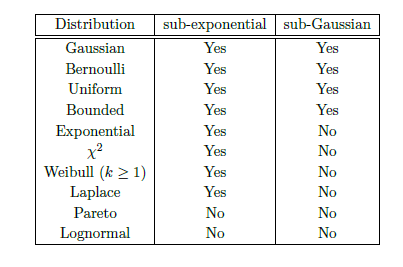

In [ ]:
# Bernoulli confidence interval
alpha = 0.1
delta = (1/np.sqrt(m))*np.sqrt((1/2)*np.log(2/alpha))
print("Confidence interval around the true risk is [%.2f,%.2f]" % (test_risk-delta,test_risk+delta))

In [ ]:
from Utils import epsilon_bounded
span = max(Y)-min(Y)
epsilon = epsilon_bounded(len(Y_test),span*2,0.05)  #span*2 since vounded over abs: |X| <= b
[MAE-epsilon,MAE+epsilon]

- **empirical mean**: $\frac{1}{n} \sum x_i$
- **empirical variance**: $ \frac{1}{n}\sum x_i^2 - (\frac{1}{n} \sum x_i)^2$
- **empirical distribution function**: $\hat{F}_n(x) = \frac{1}{n}\sum_{i=1}^{n} \mathbb{1}_{[x_i, \infty)}(x)$
- **empirical risk**: $\hat{R}(\alpha) = \frac{1}{n} \sum_{i=1}^{n} L(z,g)$ &rarr; empirical mean of loss fct

## 4. Risk

- **statistical model**: indexed family of distributions of density / regression fct. $\mathcal{F} = \{ f(x,\theta) | \theta \in \Theta\}$
    - **parametricl model**: $\Theta$ is finite dimensional
    - **non-parametric model**: $\Theta$ is infinite dimensional

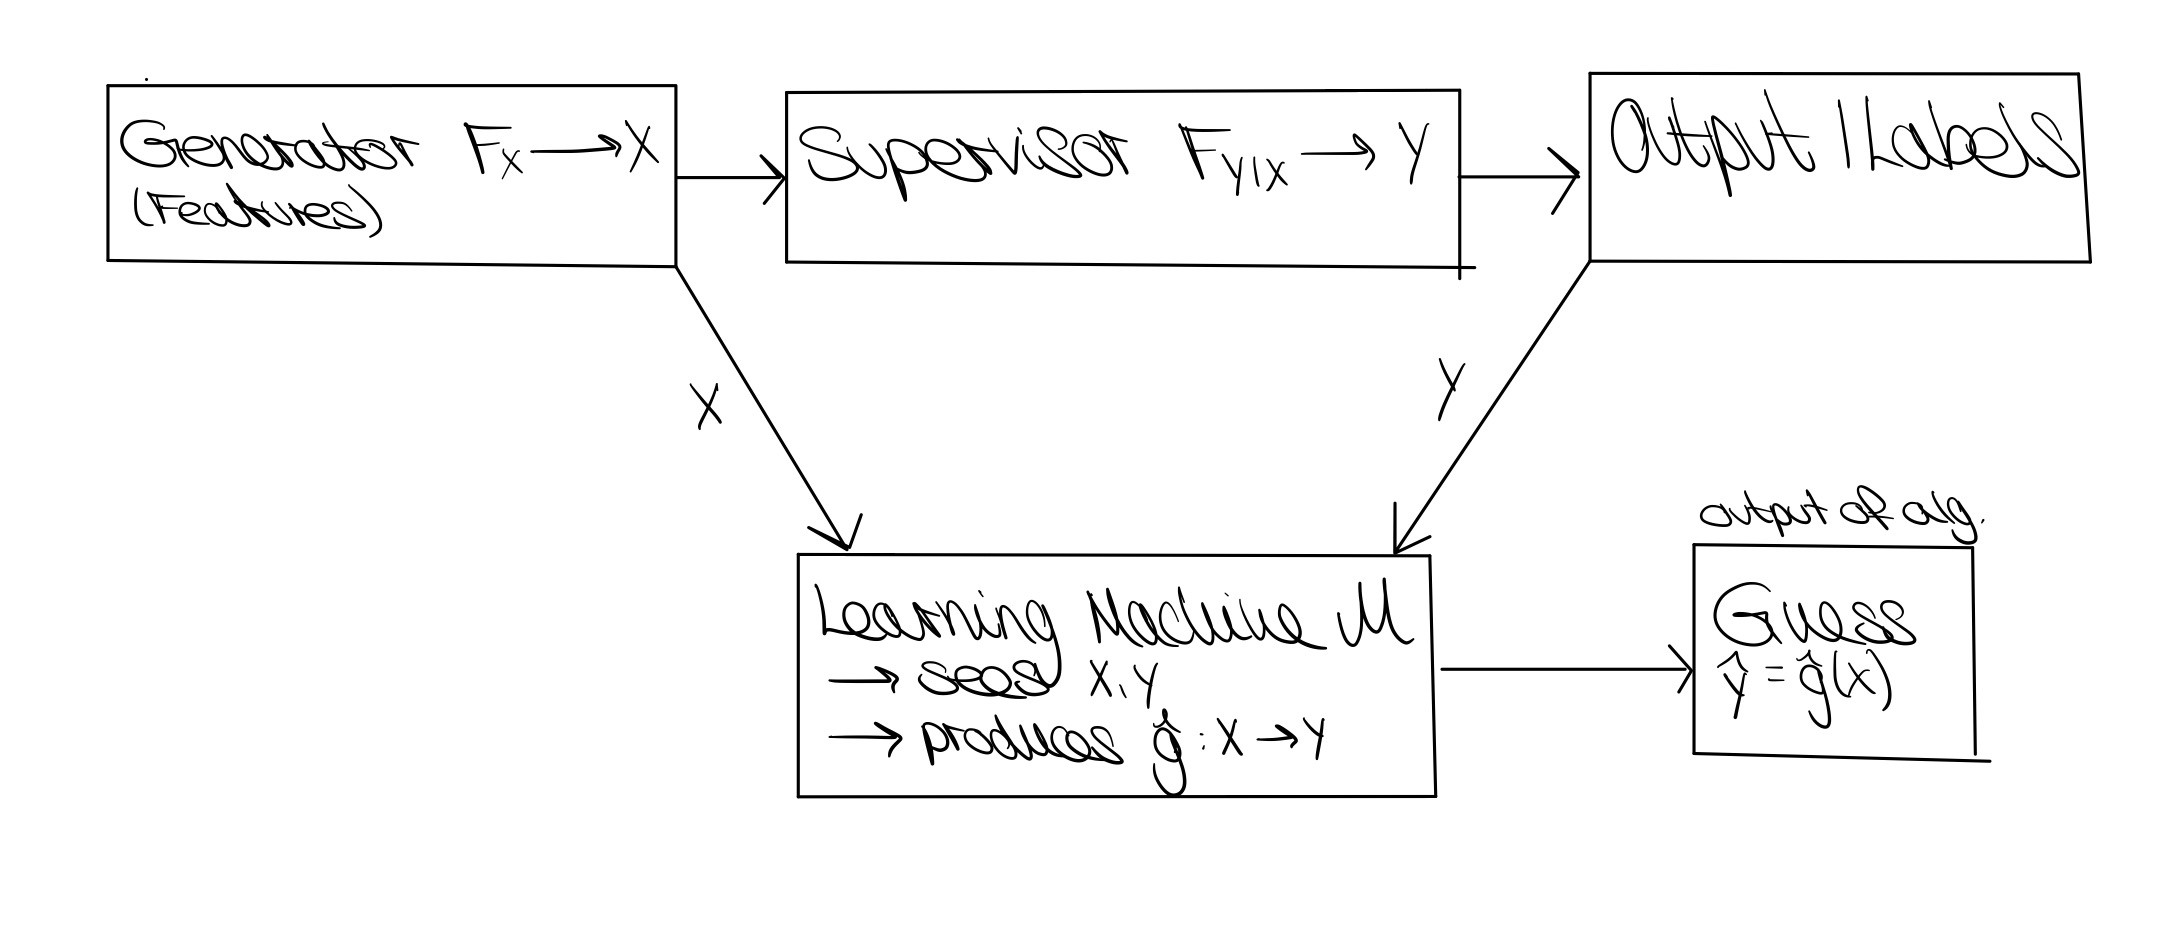

- **loss function** $L(z,g)$: measure of quality of the estimate function $g$
    - **quadratic loss**: $L((x,y),g) = (y-g(x))^2 \quad$ &rarr; regression
    - **$0-1$ loss**: $L(z,u) = \begin{cases}0, & y= u\\1, & y\neq u \end{cases} \quad$ &rarr; classification
    - **log loss**: $L(z, \alpha) = -\ln p_\alpha(z)$

- **risk**: expected loss $R(g) = \int L(z,g)dF(z) = \mathbb{E}[L(Z,g)]$
    - **risk minimizer problem**: find the function $g^*$ that minimizes the risk $g^* = \argmin_{g\in \mathcal{M}} R(g)$ 
- **regression**: find the *regression function* $r(x)= \int ydF(y|x) = \mathbb{E}[Y|X=x]$
- **classification**: $g_\lambda$ called *decision function*
    - risk $R(\lambda) = \mathbb{E}[L(Y,g_\lambda(X))] = \mathbb{P}(\{Y \neq g_\lambda(X)\})$
    - **Bayes classification rule**: $h^*(x) = \begin{cases}1, & r(x)>1/2\\0, & \text{otherwise}\end{cases} \quad \quad\Rightarrow R(h^*) \leq R(g) \quad \forall g$

- **maximum likelihood estimation**: special case of risk minimization
    - uses log-loss $\quad \Rightarrow R(\alpha) = - \int ln(p_\alpha(z))p_{\alpha^*}(z)dz$
    - empirical risk using log loss: $\hat{R}(\alpha) = - \frac{1}{n} \sum_{i=1}^{n} ln(p_\alpha(Z_i)) = $ **negative log likelihood
    - $\Rightarrow$ risk minimization $=$ log likelihood maximization
    - **linear regression** given by $f_{Y|X} = \mathcal{N}(aX+b,\sigma^2)$ is equivalent to mean square regression, more details script p.75
    - **logistic regression** given by $f_{Y|X} = \text{Bernoulli}(G(\beta_0 + \beta_1X))$ with $G(X) = \frac{1}{1+\exp^{-x}}$ &rarr; logistic fct
    

## 5. Fundamentals of Esimation

- **point estimation**: single best guess &rarr; $\theta^*$ is of interest
- **data**:  $X(\omega: \Omega\rightarrow \mathbb{X})$
    - **data space**: $\mathbb{X}$
    - **observation of data** $x\in \mathbb{X}$: realisationof RV when an experiment is performed
- **statistic** $T$: any function on data space $T(x): \mathbb{X} \rightarrow \mathbb{T}$
    - assocoated RV $T(X)$
    - **point estimator** of $\theta^* = \theta(\lambda^*) \in \mathbb{\Theta}$ is a statistic $\hat{\Theta}: \mathbb{X}\rightarrow \underbrace{\mathbb{\Theta}}_{\text{parameter space}}$
        - **sampling distribution**: distribution over $\mathbb{\Theta}$
        - **bias**: $\text{bias}(\hat{\Theta}_n(X)) = \mathbb{E}(\hat{\Theta}_n(X)) - \theta^* = \int \hat{\Theta}_n(x)dF(x;\lambda^*)-\theta(\lambda^*)$
            - **unbiased** if bias $=0$ &rarr; mean is unbiased
            - **asymptotically unbiased** $\lim_{n \to \infty} \text{bias}_n(\hat{\Theta}_n) = 0$
            - bias not computable since $\theta(\lambda^*)$ unkown
        - **standard error**:standard deviation of point estimator
            $\text{se}(\hat{\Theta}_n(X)) = \sqrt{\mathbb{V}(\hat{\Theta}_n(X))}  = \sqrt{\int(\hat{\Theta}_n(x)-\mathbb{E}_{\theta^*}(\hat{\Theta}_n))^2dF(x;\lambda^*)}$
- **mean squared error**: assesses quality of point estimator: $\text{MSE}(\hat{\Theta}_n(X)) ? \mathbb{E}_{\lambda^*}((\hat{\Theta}_n(X)-\theta^*)^2)
    - risk of point estimator with respect to quadratic loss



## 6. Random variable generation

- **pseudorandom**: $\frac{N_n(a)}{n}\to \frac{1}{M}$
    - limit of empirical mean: $\frac{M-1}{2}$
    - limit of emirical variance: $\frac{M^2-1}{12}
- **congruential generator**: $D(x) = (ax+b) \mod M$ &rarr; sequence $u_i = D(u_{i-1})$
    - producing values in $\mathcal{M} = \{0,1, \dots, M-1\}$
    - **Hull-Dobell Theorem**: period $M \iff$
        - gcd(b,M) = 1
        - every prime number $p$ that divides $M$ also divides $a-1$
        - if $4$ divides $M$ it also divides $a-1$
    - **period** $T_0$: smallest integer s.th. $u_{i+T_0} = u_i$ &rarr; desire long period
    - best period is $M \Rightarrow D$ pseudorandom on $\mathcal{M}$ 
    - sequence $v_i= u_i \mod K$ for $1\leq K \leq M$ & $nK=M$ is pseudorandom on $\{0,1,\dots,K-1\}$
    - sequence $v_i= \lfloor(u_i/M)*K\rfloor$ for $1\leq K \leq M$ & $nK=M$ is pseudorandom on $\{0,1,\dots,K-1\} \:$ &rarr; period of $v_i$ is $M$
    - generate uniform distribution by pseudorandom sequence $u_i = v_i/M$


In [ ]:
# LCG returning Uniform(0,1) distribution

from Utils import linConGen
m,a,b = (2**32, 1103515245,12345)   #define m,a,b according to Hull Dobell
seed = 1    #x to begin with

def random():
    """Generates one random sample from the uniform [0,1] distribution"""
    global seed
    seed = linConGen(m,a,b,seed,2)[1]
    return seed/m   #divide by m to get uniform in (0,1)

unif_x = [random() for i in range(1000)] # uniform list 
#_=plt.hist(unif_x,bins=10) to visualize

- **Accept-Reject-Sampler**:
    - *input*:
        - define target density $f(x)$
        - define sampling density $g(x)$ that satisfies $f(x) \leq Mg(x)$ &rarr; distribution $Mg(x)$ graphically "over" $f(x)$ 
    - *output*: samples $y$ with dist $f$
    1. Generate samples $u$ ~ Uniform $([0,1])$ and $y$ ~ $g$
    2. Compute $r(x) = \frac{f(x)}{Mg(x)}$ &rarr; density of $g$ if uniform distributed $ = \frac{1}{b-a}$
    3. If $u \leq r(\text{y})$: accept sample $y$, otherwise reject

In [ ]:
# Accept-Reject-Sampler

# two input densities
# samples as sampling density g(x)
# u uniform([0,1])

n_iterations = 1000
samples = uniformGenerator(n_iterations,seed) # samples = np.random.uniform(size = n_iterations)
u = uniformGenerator(n_iterations,seed) # u = np.random.uniform(size = n_iterations)

def f(x){
    # define target function
}
samp_accepted = []
# r(x) = f(x)/(M*g(x)) -> M defined s.th. f(x)<=Mg(x)
for i in range(n_iterations):
    if u[i]<= r(samples[i]):
        samp_accepted.append(samples[i])
    

- **Box-Muller-Theorem**: $U_1,U_2 \sim \mathcal{U}([0,1])$ iid $\Rightarrow Z_0,Z_1 \sim \mathcal{N}(0,1)$ independent with $Z_0 = \sqrt{-2\ln(U_1)\cos(2\pi U_2)}, Z_1 = \sqrt{-2\ln(U_1)\sin(2\pi U_2)}$

- **Inversion sampling**: also PSS02
    - create n uniform samples
    - get inverse function through equation transformation
    - get n x-values (as output samples), given by inverse function

In [ ]:
# Inversion sampling

import math
n=1000
numb = []
for i in range(n):
    numb.append(np.random.uniform())
x = [math.log(x+1) for x in numb]   #inverse function math.log(x+1) 

## 7. Markov chains
- **discrete stochastic process**: paratmetrized set / sequence of RVs $(X_t)_{t\in \mathbb{N}}$
- **Markov chain**: stochastic process with (finite) state space $\mathbb{X}$ s.th. $\forall t \in \mathbb{N}$: $$P(X_{t+1} \ | \, X_1,X_2,\dots,X_t) = P(X_{t+1}|X_t)$$
    - probability for next state only depends on current state
    - completely characterized by state space $\mathbb{X}$ & transition matrix $P$
- **homogeneous**: independent of specific time: $P(X_{t+1}|X_t)= P(X_{s+1}|X_s) \: \forall t,s \in \mathbb{N}$\
    - enough to know probabilities of one time step (all tiesteps are identical)\
    -  transition matrix $P_{ij} = \mathbb{P}(X_1 =j | X_0 = i)\quad$ &rarr; P(row,column)\
    $\Rightarrow \mathbb{P}(X_t = i) = \mu_t(i) = \mu_0(i)P^t\quad$ &rarr; marginal dist.\
        - prob after $n$ steps: $\mathbf{p}^{(n)} = \mathbf{p}^{(n-1)} \ \mathbf{P}\quad$ or $ \quad \mathbf{p}^{(n)} = \mathbf{p}^{(0)} \ \mathbf{P}^n $
        - **random mapping representation (RMR)** of transition matrix $P$:\
        function $\rho(x,w) s.th. \mathbb{P}(\{\rho(x,W)=y\})= P(x,y)$ &rarr; value in matrix
        - $W_i$ iid, $(\rho_t,W_t)$ RMR, $X_0 \sim \mu_0\Rightarrow X_t = \rho_t(X_{t-1},W_t)$ is Markov chain with $\mu_0$ and $P_t$
- **inhomogeneous**: \
    $ \Rightarrow \mu_t = \mu_0P_1P_2 \dots P_t$
    
- **irreducable**: from each state, each state can be reached &harr; **reducable**
- **reversible**: probability going from state $x$ to $y$ is the same as going from $y$ to $x$
    - reducable $\Rightarrow$ not reversible
- **stationary distribution**: $\pi \in \mathbb{R}^{1 \times k}$ if 
    - $\pi$ is probability distribution: $\pi(x)\geq 0 \forall x$ and $\sum_x \pi(x) =1$
    - $\pi$ is fixed point: $\pi P=\pi$
    - calculate using $P^{\text{big n}}$

In [2]:
# what is the probability to be in state X after n time steps?
import numpy as np
P = np.matrix([[9/10,1/10],[1/2,1/2]]) #transition matrix - use np.matrix!!
n = 3                    #specific time-step
p0 = np.matrix((1,0))    #probability vector for initial state (all other states 0, current state 1)
pn = p0 * P**n           #produces probability vector for day n
pn[0,1]                  #get the prob for the state you want to reach

0.15600000000000003

In [ ]:
#probability to enter state X the first time after n steps
1- {prob. to enter state X before}

# OR

# define P_reduced as transition matrix without the column/row of state you should not go to
# vector_to_reach_last_state is column of transition matrix with prob to reach state X (excluding prob from X->X (ot possible))
pn = p0*P_reduced**(n-1)*(vector_to_reach_last_state)

In [ ]:
#stationary distribution matrix

#P is given
res = np.linalg.matrix_power(P,1000)
stationary_distribution = res[1,:]      #may round numbers to 0 is very small

# OR

evals,evecs = np.linalg.eig(P.T)
first_evec = evecs[:,0]             #get first eigenvector if refering to eigenvalue 1 (=first column)
np.array(first_evec) / np.sum(first_evec)   #normalize it

In [ ]:
# expected number of steps to reach state X the first time

n = 50          # number of steps given in exercise

# use decreased stationary/transition matrix for all steps before the last one
# remove row & column refering to state X
P1 = np.matrix([[0.3,0.7,0],[0.2,0.5,0.3],[0,0,0.5]])

# initial state - unit vector representing the start state given the reduced matrix
p0 = np.matrix((1,0,0)) 

# np.linalg.matrix_power(P1,t-1) - t-1 steps using only reduced P1 matrix
# t^th step: np.array([P[0,3],P[1,3],P[2,3]] is column of P, through which state X will be reached 
solution = np.sum([t*p0@np.linalg.matrix_power(P1,t-1)@np.array([P[0,3],P[1,3],P[2,3]]) for t in range(1,n)])
print(solution)


## 8. Pattern Recognition = Classification

- **perceptron algorithm**:
    - data needs to be seperable
    - finds hyperplane $w^*$ (if it exists) that seperates two classes in most $r^2|w^*|^2$ steps with $r = max_i |x_i|$
    - $w^* = \frac{w}{\min w \cdot x_iy_i}$
    1. w = 0
    2. while $x_i$ with $x_iy_i \cdot w \leq 0$: update $w = w + x_iy_i$

- **pattern recognition problem**: minimizing the risk $R(g) = \int L(y,g(x))dF(x,y) = \mathbb{E}[L(Y,g(X))] \quad$ 
    - **empirical risk**: $\hat{R}_n(g) = \frac{1}{n}\sum_{i=1}^n L(Y_i,g(X_i))\quad$ with $g$ decision function
    - **precision**:$\mathbb{P}(Y=1|g(X)=1) =\frac{\text{\# correctly predicted 1}}{\text{\#predicted 1}}$ &rarr;prob. of label 1, if model predicts 1
    - **recall**: $\mathbb{P}(g(X)=1|Y=1) =\frac{\text{\# correctly predicted 1}}{\text{\#actual 1}}$ &rarr;prob. model predicts 1, if actual label 1
        - trade-off between precision & recall - choose $\lambda$: $ g_\lambda(x) = \begin{cases}1, & \text{if } G(x) > \lambda \\0, & \text{otherwise.}\end{cases}$
    - **empirical error rate**: $\hat{L}_n(g) = \frac{1}{n} \sum_{i=1}^n \mathbb{I}(g(X_i)\neq Y_i)$ 
        > np.mean(Y_train!=prediction)
    - **kernelization**: map input (non-linearly seperable data) into higher space and apply classifier there to make in linear seperable &rarr; more information in *10-Pattern-Recognition*



## 9. Regression

- real valued loss function instead of discrete like classification
- supervisor has $F_{Y|X} \Rightarrow$ LM only tries to learn $r(X) = \mathbb{E}(Y|X)$
- **regression function**: $r(x) = \int ydF(y|x) = \mathbb{E}[Y|X=x]$
    - statistical model: $\mathcal{F} = \{F(x,y) = \mathbb{1}_{y\geq f(x)}(y)F(x), f \in C([0,1],\mathbb{R})\}$
    - model space: $\mathcal{M} = \{g_\lambda(x) | \lambda \in \Lambda\}$ &rarr; param. space of fcts in which searching for $f$
    - loss fct: $L:[0,1] \times \mathbb{R} \rightarrow \mathbb{R}$ \
    &rarr; quadratic risk: $R(\phi) = \mathbb{E}[(Y-g(X))^2] = \underbrace{\mathbb{E}[(Y-r(X))^2]}_{\text{variance}} + \underbrace{\mathbb{E}[(r(X)-g_\lambda(X))^2]}_{\text{bias}^2}$
- **common test metrics**:
    - **MSE**: $\mathbb{E}[(\hat{\phi}(X)-Y)^2| \hat{\phi}]$
    - **RMSE**: $\sqrt{\mathbb{E}[(\hat{\phi}(X)-Y)^2| \hat{\phi}]}$
    - **MAE**: $\mathbb{E}[\hat{\phi}(X)-Y| \hat{\phi}]$
    - **$R^2$ / explained variance**: $1- \frac{\mathbb{E}[(\hat{\phi}(X)-Y)^2| \hat{\phi}]=\text{MSE}}{\mathbb{V}(Y)}$
        > returned when using *score*
- **Calibration error**:$\sqrt{\mathbb{E}[||\mathbb{E}[Y|f(X)]-f(X)||^2]}$ &rarr; bias
    > notebook *12-Regression*



## 10. High dimension

- **volume of the unit ball** in $d$ dimensions: $V(d) = \frac{2 \pi^{\frac{d}{2}}}{d \Gamma(\frac{d}{2})}$ with $\Gamma(k) = (k-1)!$
    - decreases with raising dimension: $d>4\pi$, $B_1 \subset \mathbb{R}^d \Rightarrow \exists \:C>1: |B_1| \leq\frac{C}{d}$
- most of the volumne of a unit ball / d-dim. cube is located close to the surface $\Rightarrow \frac{|(1-\epsilon)Q|}{|Q|} = (1-\epsilon)^d \xrightarrow[]{d \to \infty} 0$
    - **Gaussian annulus theorem**: most of volumne of a d-dim unit ball is in the annulus of size $\sqrt{d}$

## 11. Dimension reduction

- projection of point $x$ onto line $v$: $(v \cdot x) v$
- **random projection theorem**: length is preserved (with high probability) if we project on random Gaussian vectors
    - allows projection and preserves pairwise distance
### SVD - Singular Value Decomposition
- represent data $\{X_1,\dots, X_n\} \in \mathbb{R}^m$ in a low-dimensional subspace
- **fist singular vector**: $v_1 = \argmax_{\|v\|=1} |Av| \quad$ with $A=\begin{pmatrix} - & X_1 & -\\ - & X_2 & -\\  & \dots & \\ - & X_n & - \end{pmatrix} \in \mathbb{R}^{n \times m}$
    - $\Rightarrow v_1$ is eigenvector of $A^TA$
    - if $v$ is singular vector also $-v$
    - **second singular vector**: also solving max. problem, but orthogonal to $v_1$: $v_2 = \argmax_{\|v\|=1, v \perp v_1} |Av|$
- **first singiular value**: $\sigma_1(A) = |Av|$
    - $\Rightarrow \sigma_1(A)^2$ is first eigenvalue of $A^TA$
    - $\sigma_1$ is standard diviation in the direction of first singular vector
    - $A^TA$ is the empirical covariance matrix
- **Singular value decomposition of matrix**: $A = UDV^T$ with
    - $U=\begin{pmatrix} | &  & |\\ u_1 & \dots & u_n\\ | &  & |\end{pmatrix} \in \mathbb{R}^{n \times n}, D=\begin{pmatrix} \sigma_1 &  & & 0\\  & \sigma_2 & &\\  &  & \dots & \\ 0 & & & \sigma_n \end{pmatrix} \in \mathbb{R}^{n\times m} , V=\begin{pmatrix} | &  & |\\ v_1 & \dots & v_m\\ | &  & |\end{pmatrix}\in \mathbb{R}^{m \times m}$
    - $u_i$: **left sigular vectors**
    - $U^TU = 1$ since sigular vectors are othorgonal 
- **PCA**: coordinate transformation from original coordinates to coordinate system spanned by singular vectors $PCA(A) =AV = UD$



In [ ]:
# SVD
U,D,VT = np.linalg.svd(X,full_matrices=False)
D = np.diag(D)

## Metrics & Justifications

In machine learning, metrics are used to evaluate the performance of a model by quantifying how well it is able to accomplish a specific task. The choice of metrics depends on the nature of the problem and the goals of the model. Here are some common metrics used in various machine learning tasks along with their reasons and justifications:

1. **Accuracy:**
   - **Definition:** The ratio of correctly predicted instances to the total instances.
   - **Use Case:** Suitable for balanced datasets where classes are approximately equally distributed.
   - **Justification:** Provides a general overview of the model's performance.

2. **Precision:**
   - **Definition:** The ratio of true positive predictions to the total positive predictions.
   - **Use Case:** Important when the cost of false positives is high.
   - **Justification:** Focuses on the accuracy of positive predictions and minimizes false positives.

3. **Recall (Sensitivity or True Positive Rate):**
   - **Definition:** The ratio of true positive predictions to the total actual positives.
   - **Use Case:** Important when the cost of false negatives is high.
   - **Justification:** Focuses on capturing as many positive instances as possible.

4. **F1 Score:**
   - **Definition:** The harmonic mean of precision and recall.
   - **Use Case:** Balances precision and recall when there is an uneven class distribution.
   - **Justification:** Useful when there is a need to find a compromise between precision and recall.

5. **Specificity:**
   - **Definition:** The ratio of true negatives to the total actual negatives.
   - **Use Case:** Important when the cost of false positives is high.
   - **Justification:** Complements sensitivity by focusing on the accuracy of negative predictions.

6. **Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC):**
   - **Definition:** The area under the ROC curve, which plots the true positive rate against the false positive rate.
   - **Use Case:** Useful for evaluating binary classification models.
   - **Justification:** Provides a comprehensive measure of a model's ability to distinguish between classes.

7. **Mean Squared Error (MSE):**
   - **Definition:** The average of the squared differences between predicted and actual values.
   - **Use Case:** Commonly used in regression problems.
   - **Justification:** Penalizes large errors and is sensitive to outliers.

8. **Mean Absolute Error (MAE):**
   - **Definition:** The average of the absolute differences between predicted and actual values.
   - **Use Case:** Another metric for regression tasks, less sensitive to outliers than MSE.
   - **Justification:** Provides a measure of the average magnitude of errors.

9. **R-squared (Coefficient of Determination):**
   - **Definition:** Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
   - **Use Case:** Commonly used in regression to assess the goodness of fit.
   - **Justification:** Indicates the proportion of variability in the dependent variable that the model explains.

These metrics help practitioners choose and fine-tune models based on the specific requirements of their tasks. It's essential to consider the business context and consequences of different types of errors when selecting the appropriate metrics for evaluation.

## Metrics naive possibilities

A naive model serves as a baseline for comparison, helping you assess whether your machine learning model provides any improvement over a simplistic approach. The choice of a naive model depends on the nature of your problem. Here are a few examples:

1. **Random Guessing:**
   - **Task:** Classification or binary decision problems.
   - **Naive Model:** Randomly guessing the class with equal probability for all classes.
   - **Metric Comparison:** Compare your model's accuracy, precision, recall, etc., against the random guessing baseline. Your model should significantly outperform random guessing to be considered effective.

2. **Always Predicting Majority Class:**
   - **Task:** Imbalanced classification problems.
   - **Naive Model:** Always predicting the majority class.
   - **Metric Comparison:** Evaluate your model against precision, recall, and F1 score. If your model cannot outperform this baseline, it may not be effectively capturing patterns in the data.

3. **Predicting the Mean or Median:**
   - **Task:** Regression problems.
   - **Naive Model:** Always predicting the mean or median of the target variable.
   - **Metric Comparison:** Compare your model's performance using metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE) against the baseline of predicting the mean. Your model should demonstrate a reduction in error compared to this naive approach.

4. **Time-Based Baseline:**
   - **Task:** Time-series prediction.
   - **Naive Model:** Predicting the value from the previous time step (naive persistence).
   - **Metric Comparison:** Assess your model's performance using metrics suitable for time-series data, such as Mean Absolute Error or Root Mean Squared Error, and compare it against the naive persistence model.

5. **Constant Prediction:**
   - **Task:** Any predictive modeling task.
   - **Naive Model:** Predicting a constant value based on a simple rule or intuition.
   - **Metric Comparison:** Compare your model's performance against the constant prediction baseline. If your model cannot beat this naive strategy, it might not be providing meaningful predictions.

By comparing your model's performance to these naive baselines, you can determine whether your machine learning model is adding value beyond what could be achieved with simple, rule-based strategies. If your model cannot outperform these naive approaches, it suggests that there may be limitations or issues that need to be addressed in the development of your model.

## Metrcis - Dicussion on reasonable metric for regression

Certainly! When choosing metrics for evaluating a regression model, it's essential to consider the specific characteristics of the problem at hand and the goals of the modeling task. Different metrics capture different aspects of model performance, and the choice should align with the priorities and requirements of the application. Let's discuss some reasonable metrics for a regression model:

1. **Mean Squared Error (MSE):**
   - **Discussion:** MSE is a widely used metric that calculates the average squared difference between the predicted and actual values. It penalizes large errors more heavily, making it sensitive to outliers. This makes it suitable for cases where larger errors should be considered more significant.
   - **Use Case:** MSE is appropriate when the goal is to minimize the overall variance of prediction errors.

2. **Mean Absolute Error (MAE):**
   - **Discussion:** MAE measures the average absolute difference between the predicted and actual values. It is less sensitive to outliers compared to MSE, making it a robust choice for scenarios where the impact of outliers needs to be minimized.
   - **Use Case:** MAE is suitable when the focus is on the average magnitude of errors without being overly influenced by extreme values.

3. **R-squared (Coefficient of Determination):**
   - **Discussion:** R-squared provides a measure of the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. R-squared helps assess the goodness of fit of the model.
   - **Use Case:** R-squared is valuable when understanding the overall explanatory power of the model is crucial.

4. **Root Mean Squared Error (RMSE):**
   - **Discussion:** RMSE is the square root of the MSE and shares its characteristics but is expressed in the same units as the target variable. It is interpretable and provides a measure of the average size of errors.
   - **Use Case:** RMSE is suitable when the scale of errors should be easily interpretable in the same units as the target variable.

5. **Mean Percentage Error (MPE) or Mean Absolute Percentage Error (MAPE):**
   - **Discussion:** MPE and MAPE measure the average percentage difference between predicted and actual values. They are useful when understanding errors in percentage terms is important, such as in financial forecasting.
   - **Use Case:** MPE and MAPE are appropriate when expressing errors as a percentage of the actual values is meaningful.

6. **Huber Loss:**
   - **Discussion:** Huber Loss is a combination of MSE and MAE, providing a compromise between the two. It is less sensitive to outliers than MSE but still penalizes large errors.
   - **Use Case:** Huber Loss is suitable when a balance between the robustness of MAE and the sensitivity of MSE is desired.

7. **Quantile Loss:**
   - **Discussion:** Quantile Loss evaluates the accuracy of predicting specific quantiles of the target distribution. It is useful when assessing performance at different points of the distribution.
   - **Use Case:** Quantile Loss is valuable when understanding the model's behavior across different percentiles of the target variable is important.

In conclusion, the choice of regression metrics should be guided by the specific characteristics of the data and the goals of the modeling task. It's often beneficial to consider a combination of metrics to gain a comprehensive understanding of the model's performance. Additionally, domain knowledge and business requirements play a crucial role in determining the most suitable metrics for a given regression problem.

## Metrics - Discussion on reasonable metric for classification model

Certainly! When evaluating a classification model, the choice of metrics depends on the nature of the problem, the class distribution, and the specific goals of the model. Here's a discussion about reasonable metrics for a classification model:

1. **Accuracy:**
   - **Discussion:** Accuracy is a straightforward metric that measures the ratio of correctly predicted instances to the total instances. It is suitable for balanced datasets where classes are approximately equally distributed.
   - **Use Case:** Accuracy provides a general overview of the model's performance and is often used as a baseline metric.

2. **Precision:**
   - **Discussion:** Precision measures the ratio of true positive predictions to the total positive predictions. It is important when the cost of false positives is high, and the focus is on the accuracy of positive predictions.
   - **Use Case:** Precision is valuable in applications where the consequences of incorrectly labeling instances as positive are significant.

3. **Recall (Sensitivity or True Positive Rate):**
   - **Discussion:** Recall calculates the ratio of true positive predictions to the total actual positives. It is important when the cost of false negatives is high, and the emphasis is on capturing as many positive instances as possible.
   - **Use Case:** Recall is crucial in situations where missing positive instances is a critical concern.

4. **F1 Score:**
   - **Discussion:** F1 Score is the harmonic mean of precision and recall, providing a balance between the two. It is useful when there is an uneven class distribution.
   - **Use Case:** F1 Score is appropriate when there is a need to find a compromise between precision and recall.

5. **Specificity:**
   - **Discussion:** Specificity measures the ratio of true negatives to the total actual negatives. It complements sensitivity by focusing on the accuracy of negative predictions.
   - **Use Case:** Specificity is relevant when the cost of false positives for the negative class is a significant concern.

6. **Area Under the Receiver Operating Characteristic (ROC) Curve (AUC-ROC):**
   - **Discussion:** AUC-ROC provides an overall assessment of a model's ability to distinguish between classes by plotting the true positive rate against the false positive rate.
   - **Use Case:** AUC-ROC is suitable for binary classification problems and helps evaluate the model's performance across different thresholds.

7. **Area Under the Precision-Recall Curve (AUC-PR):**
   - **Discussion:** AUC-PR evaluates the trade-off between precision and recall at various classification thresholds. It is particularly useful when dealing with imbalanced datasets.
   - **Use Case:** AUC-PR provides insights into the model's performance in capturing positive instances in imbalanced scenarios.

8. **Cohen's Kappa:**
   - **Discussion:** Cohen's Kappa measures the agreement between predicted and actual classifications, correcting for the agreement that could occur by chance.
   - **Use Case:** Cohen's Kappa is valuable when assessing the model's performance while accounting for the baseline agreement.

9. **Log Loss (Cross-Entropy Loss):**
   - **Discussion:** Log Loss measures the performance of a classification model where the output is a probability. It penalizes models for being confidently wrong.
   - **Use Case:** Log Loss is suitable when understanding the uncertainty of the model's predictions is important.

10. **Matthews Correlation Coefficient (MCC):**
    - **Discussion:** MCC takes into account true and false positives and negatives, providing a balanced metric even in imbalanced datasets.
    - **Use Case:** MCC is appropriate when seeking a metric that considers all aspects of the confusion matrix.

In summary, the choice of classification metrics depends on the specific objectives of the model and the characteristics of the data. It's often beneficial to consider multiple metrics to gain a comprehensive understanding of the model's performance, especially in cases of imbalanced classes or different priorities for false positives and false negatives.